In [1]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#to move from notebooks/example_notebook.ipynb
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries


In [4]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")


In [5]:
# Define the SQL query
query = "SELECT * FROM xdr_data;"

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

Successfully loaded the data


In [6]:
print("using the prefered method(SQLAlchemy)")
df

using the prefered method(SQLAlchemy)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [7]:
# Count missing values per column
missing_values = df.isnull().sum()

# Percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [8]:
#handling the missing value

import user_overview_EDA as uoe
uoe.handle_missing_values(df, unique_identifiers=['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI'])



Checking column 'Bearer Id' for NaN values...
NaN values in 'Bearer Id': 991
Checking column 'IMSI' for NaN values...
NaN values in 'IMSI': 9
Checking column 'MSISDN/Number' for NaN values...
NaN values in 'MSISDN/Number': 495
Checking column 'IMEI' for NaN values...
NaN values in 'IMEI': 0


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [9]:
#function to treat outliers
uoe.treat_outliers(df)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244958.75,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244958.75,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244958.75,2.082008e+14,3.373182e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244958.75,2.082014e+14,3.373182e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244958.75,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.00,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.00,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.00,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.00,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [10]:
#Aggregate Engagement Metrics Per Customer
import User_Experiance as uex
data = uoe.treat_outliers(df)
uex.aggregate_per_customer(data)

,MSISDN/Number,Average TCP Retransmission DL,Average TCP Retransmission UL,Average RTT DL,Average RTT UL,Handset Type,Average Throughput DL,Average Throughput UL
0,3.360301e+10,1.489949e+07,572898.984564,68.465280,8.926907,undefined,8742.406522,523.211801
1,3.360301e+10,1.047058e+07,759658.664811,67.397853,11.831441,Samsung Galaxy Note 8 (Sm-N950F),3727.500000,708.000000
2,3.360301e+10,2.080991e+07,759658.664811,109.795706,17.662883,Samsung Galaxy S7 (Sm-G930X),6.000000,9.000000
3,3.360301e+10,2.080991e+07,759658.664811,20.000000,2.000000,Apple iPhone X (A1901),61.000000,54.000000
4,3.360301e+10,2.080991e+07,759658.664811,25.000000,2.000000,Apple iPhone 7 (A1778),23.000000,44.000000
...,...,...,...,...,...,...,...,...
89378,3.370000e+10,2.080991e+07,759658.664811,109.795706,17.662883,Samsung Galaxy J5 (Sm-J530),6.000000,9.000000
89379,3.370000e+10,7.732280e+05,122288.000000,214.000000,11.000000,Apple iPhone 6 (A1586),4073.000000,402.000000
89380,3.370000e+10,6.785000e+03,759658.664811,20.000000,9.000000,Huawei P9 Lite,8018.000000,174.000000
89381,3.370000e+10,2.080991e+07,759658.664811,109.795706,17.662883,Samsung Galaxy J7,6.000000,9.000000


In [11]:
#function to compute top bottom and frequent tcp rtt and throughput
import User_Experiance as uex
# Define columns of interest
columns_of_interest = {
    'TCP DL Retrans. Vol (Bytes)': 'TCP_DL',
    'TCP UL Retrans. Vol (Bytes)': 'TCP_UL',
    'Avg RTT DL (ms)': 'RTT_DL',
    'Avg RTT UL (ms)': 'RTT_UL',
    'Avg Bearer TP DL (kbps)': 'Throughput_DL',
    'Avg Bearer TP UL (kbps)': 'Throughput_UL'
}
uex.compute_and_display_stats(df, columns_of_interest, top_n=10)

Processing column: TCP_DL
Processing column: TCP_UL
Processing column: RTT_DL
Processing column: RTT_UL
Processing column: Throughput_DL
Processing column: Throughput_UL

Metric: TCP_DL
Top Values:
147    4.990830e+07
175    4.990830e+07
440    4.990830e+07
538    4.990830e+07
555    4.990830e+07
557    4.990830e+07
566    4.990830e+07
578    4.990830e+07
606    4.990830e+07
655    4.990830e+07
Name: TCP_DL, dtype: float64

Bottom Values:
59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP_DL, dtype: float64

Most Frequent:
TCP_DL
2.080991e+07    87764
4.990830e+07     2513
1.330000e+03      423
2.660000e+03      212
3.800000e+01      199
9.200000e+01      188
1.318000e+03      154
5.430000e+02      130
3.990000e+03      109
7.600000e+01      105
Name: count, dtype: int64

Metric: TCP_UL
Top Values:
566     1.800411e+06
677     1.800411e+06
744     1.800411e+06
788     1.800411e+06
821    

{'TCP_DL': {'Top Values': 147    4.990830e+07
  175    4.990830e+07
  440    4.990830e+07
  538    4.990830e+07
  555    4.990830e+07
  557    4.990830e+07
  566    4.990830e+07
  578    4.990830e+07
  606    4.990830e+07
  655    4.990830e+07
  Name: TCP_DL, dtype: float64,
  'Bottom Values': 59717     2.0
  125094    2.0
  2850      4.0
  39610     4.0
  52488     4.0
  60376     4.0
  60426     4.0
  75093     4.0
  100314    4.0
  143429    4.0
  Name: TCP_DL, dtype: float64,
  'Most Frequent': TCP_DL
  2.080991e+07    87764
  4.990830e+07     2513
  1.330000e+03      423
  2.660000e+03      212
  3.800000e+01      199
  9.200000e+01      188
  1.318000e+03      154
  5.430000e+02      130
  3.990000e+03      109
  7.600000e+01      105
  Name: count, dtype: int64},
 'TCP_UL': {'Top Values': 566     1.800411e+06
  677     1.800411e+06
  744     1.800411e+06
  788     1.800411e+06
  821     1.800411e+06
  902     1.800411e+06
  909     1.800411e+06
  923     1.800411e+06
  987     1

C:\Users\HP\OneDrive\Desktop\KAIM\kaim-week-02\scripts\User_Experiance.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_column, y=handset_column, data=distribution_sorted, palette="viridis")


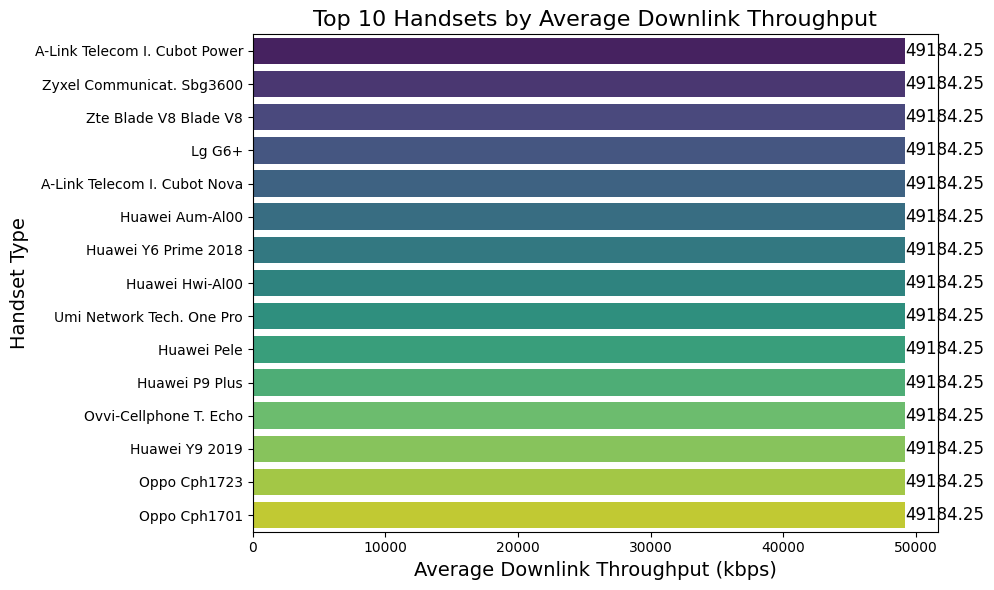

In [16]:
# Import the necessary functions from the module
from User_Experiance import distribution_per_handset
#Distribution of Average Throughput per Handset Type
# Downlink throughput
throughput_dl = distribution_per_handset(
    df, 
    'Throughput_DL',  # Metric for downlink throughput
    'Handset Type',    # Handset type column
    'Top 10 Handsets by Average Downlink Throughput',  # Title
    'Average Downlink Throughput (kbps)',  # Y-axis label
    top_n=15  # Limit to top 10 handset types
)

C:\Users\HP\OneDrive\Desktop\KAIM\kaim-week-02\scripts\User_Experiance.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_column, y=handset_column, data=distribution_sorted, palette="viridis")


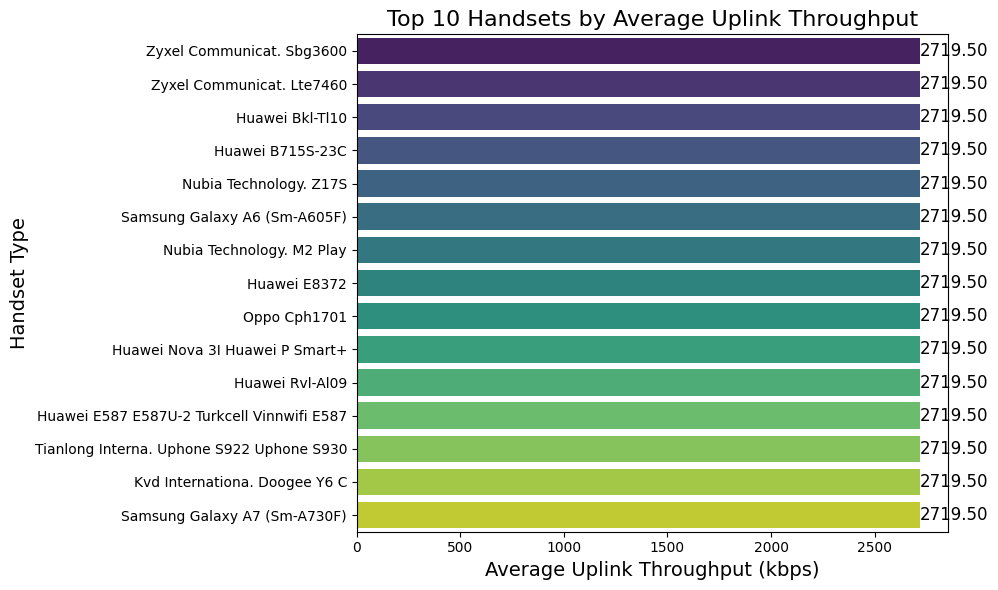

In [21]:
# Uplink throughput
throughput_ul = distribution_per_handset(
    df, 
    'Throughput_UL',  # Metric for uplink throughput
    'Handset Type',    # Handset type column
    'Top 10 Handsets by Average Uplink Throughput',  # Title
    'Average Uplink Throughput (kbps)',  # Y-axis label
    top_n=15  # Limit to top 10 handset types
)